# Figure 13. BFMM simulations (orientation)

### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from models import load_bfmm_fit, compute_relative_error
from utils import vonmises_pdf, round_df_angles, get_response_df, min_angle
from data import load_data
from vis import plot_bfmm_illustration, plot_model_bias, plot_data_bias, set_export_style, set_axes_rad, FREE_ORIENT, RAND_ORIENT, KAPPA_OBS_PALETTE, plot_bias_ols_by_response, plot_bias_ols_by_k

save_fig = False

### Load data

In [3]:
def get_unique_components(df_fit, var='mu_hat'):
    """gets number of unique components for each trial (using var)
    """
    set_size = df_fit.attrs['data_params']['set_size']
    mu_cols = [f'{var}_{i}' for i in (np.arange(set_size) + 1)]
    mu_df = pd.DataFrame(df_fit[mu_cols].to_numpy().T)
    df_fit['n_components'] = mu_df.nunique().to_numpy()

    return df_fit

In [4]:
# load and process bfmm fits for plotting; concatenate into single dataframe 
# (takes a while...)

modality = 'orient'
conditions = ['free', 'rand'] 
datasets = ['continuous']
kappas = [5, 10, 20]
K = 6
set_size = 6
var_list = ['presented_rad', 'reported_rad', 'theta_hat', 'mu_hat']
trial_var_list = ['n_components']

df_list = []
for dataset in datasets:
    for condition in conditions:
        for kappa_obs in kappas:
            temp_df = load_bfmm_fit(modality, condition, dataset, set_size, kappa_obs, K)

            temp_df = get_unique_components(temp_df)
            temp_df = get_response_df(temp_df, var_list, trial_var_list)
            temp_df['kappa_obs'] = kappa_obs
            temp_df['dataset'] = dataset
            temp_df['condition'] = condition
            n_angles = 360 if dataset == 'continuous' else 8
            temp_df = round_df_angles(temp_df, var='theta_hat', n_angles=n_angles)
            df_list.append(temp_df)
    
df_fit = pd.concat(df_list).reset_index(drop=True)
df_fit['relative_mean'] = min_angle(df_fit['presented_rad'], df_fit['mu_hat'], radians=True)

### Figure 13A. Continuous BFMM model bias

In [ ]:
df = df_fit[(df_fit['dataset'] == 'continuous') & (df_fit['condition'] == 'free') & (df_fit['response'] == 1)]
df['relative_mean'], df['relative_error'] = compute_relative_error(df,         
                                            var='theta_hat',
                                            bias_toward='mu_hat')

scatter_kws = {'s': 10, 'alpha': 0.1}
line_kws = {'color': 'k', 'linewidth': 1.5, 'linestyle': '--'}
fig, axes, g = plot_bias_ols_by_k(df, x_var='relative_mean', 
                                         y_var='relative_error', 
                                         x_range=[-np. pi / 2, np.pi / 2],
                                         scatter_kws=scatter_kws, 
                                         line_kws=line_kws,
                                         stats=False, 
                                         sharey=False,
                                         sharex=False)

fig.set_size_inches((6, 2))

for ind, ax in enumerate(axes):
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim([-np.pi - 0.1, np.pi + 0.1])
    ax.set_yticks([-np.pi, 0, np.pi])
    ax.set_yticklabels([r'$-\pi$', '0', r'$\pi$'])
    ax.set_xticks([-np.pi / 2, 0, np.pi/2])
    ax.set_xlim([-np.pi / 2 - 0.05, np.pi / 2 + 0.05])
    ax.set_xticklabels([r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$'])
    ax.spines['left'].set_position(('outward',10))
    ax.spines['left'].set_bounds((-np.pi, np.pi))
    ax.spines['bottom'].set_position(('outward',10))
    ax.spines['bottom'].set_bounds((-np.pi / 2, np.pi / 2))

    if ind != 0:
        ax.set_yticks([])
        ax.spines['left'].set_visible(False)
        ax.set_xticks([])
        ax.spines['bottom'].set_visible(False)

if save_fig:
    plt.savefig('../figures/fig_06-01_model_bias_ss6_cont.png', bbox_inches='tight', dpi=800)

### Figure 13B. Orientation data bias

/tmp/ipykernel_55123/65341048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_free_cont['condition'] = 'free'
/tmp/ipykernel_55123/65341048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rand_cont['condition'] = 'rand'
/home/benc/phd/cuthbert-et-al-2020/venv/lib/python3.10/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/home/benc/phd/cuthber

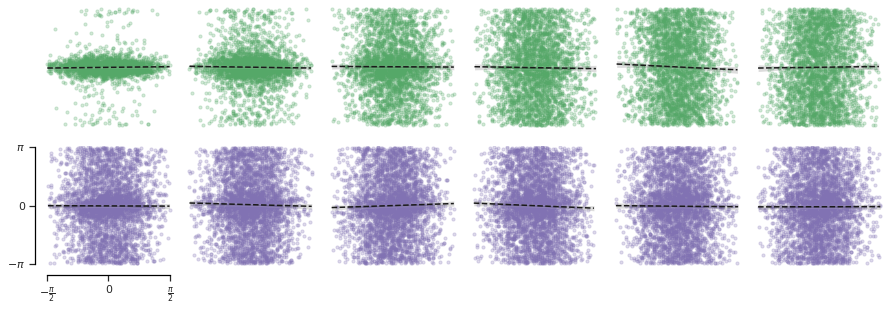

In [10]:
# plot data bias by response (continuous)
df_free_cont['condition'] = 'free'
df_rand_cont['condition'] = 'rand'

df = pd.concat([df_free_cont, df_rand_cont]).reset_index(drop=True)
df['relative_mean'], df['relative_error'] = compute_relative_error(df,         
                                            var='reported_rad',
                                            bias_toward='mu_hat')

scatter_kws = {'s': 10, 'alpha': 0.25}
line_kws = {'color': 'k', 'linewidth': 1.5, 'linestyle': '--'}
fig, axes, g = plot_bias_ols_by_response(df, x_var='relative_mean', 
                                         y_var='relative_error', 
                                         x_range=[-np. pi / 2, np.pi / 2],
                                         scatter_kws=scatter_kws, 
                                         line_kws=line_kws,
                                         stats=False, 
                                         sharey=False,
                                         sharex=False,
                                         palette=[FREE_ORIENT, RAND_ORIENT])
fig.set_size_inches((12, 4))

for ind, ax in enumerate(axes):
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim([-np.pi - 0.1, np.pi + 0.1])
    ax.set_yticks([-np.pi, 0, np.pi])
    ax.set_yticklabels([r'$-\pi$', '0', r'$\pi$'])
    ax.set_xticks([-np.pi / 2, 0, np.pi/2])
    ax.set_xlim([-np.pi / 2 - 0.05, np.pi / 2 + 0.05])
    ax.set_xticklabels([r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$'])
    ax.spines['left'].set_position(('outward',10))
    ax.spines['left'].set_bounds((-np.pi, np.pi))
    ax.spines['bottom'].set_position(('outward',10))
    ax.spines['bottom'].set_bounds((-np.pi / 2, np.pi / 2))

    if ind != 6:
        ax.set_yticks([])
        ax.spines['left'].set_visible(False)
        ax.set_xticks([])
        ax.spines['bottom'].set_visible(False)

if save_fig:
    plt.savefig('../figures/fig_S06-02_data_bias_ss6_cont.png', bbox_inches='tight', dpi=800)
